In [1]:
import tensorflow as tf
tf.__version__

'2.11.0'

1.卷积神经⽹络的基本结构
每个输⼊图像通常表示为[⾼度，宽度，通道]形状的3D张量。
⼩批量表示为[⼩批量，⾼度，宽度，通道]形状的4D张量。
卷积层的权重表示为[fn,fw,fn,fn']形状的4D张量。
卷积层的偏置项简单地表示为[fn]的形状1D张量。

2. 卷积神经⽹络的Filters(卷积核/过滤器)
神经元的权重可以⽤⼤⼩为感受区的图像来表示，我们把它称为过滤器（或卷积内核）。
使⽤下列代码实现对两种过滤器的对⽐分析。

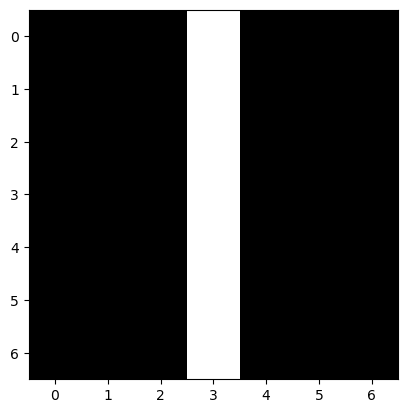

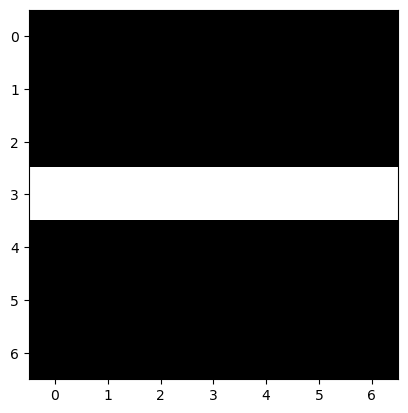

In [3]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# tf.enable_eager_execution()


def plot_image(image):
    # 绘图时采用最近插值
    plt.imshow(image, cmap="gray", interpolation="nearest")


def plot_color_image(image):
    # 绘图时作用的张量需要先进行数据类型转换
    plt.imshow(tf.cast(image, np.uint8), interpolation="nearest")


china = load_sample_image("china.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(images, feature_maps,
strides=[1, 1, 1, 1],
padding="SAME")


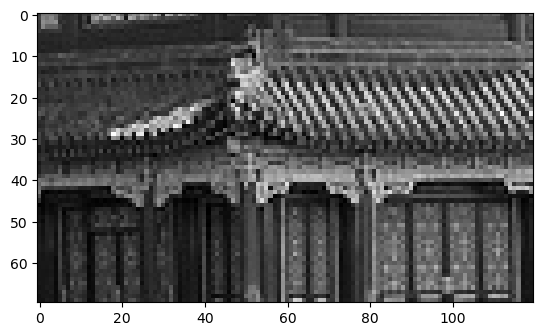

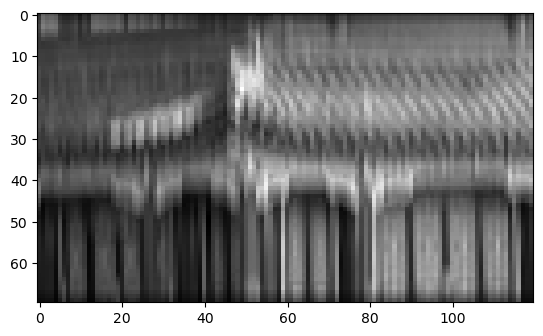

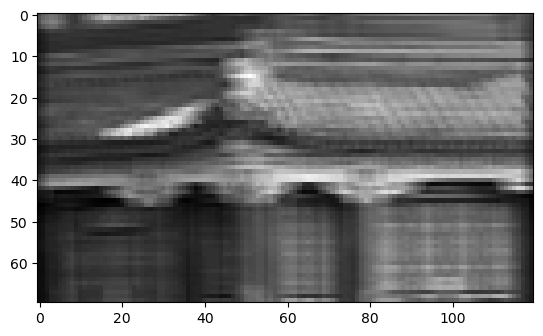

In [4]:
plot_image(images[0, :, :, 0])
plt.show()
plot_image(convolution[0, :, :, 0])
plt.show()
plot_image(convolution[0, :, :, 1])
plt.show()


3. 卷积神经⽹络池化层
池化层的⽬标是对输⼊图像进⾏⼆次采样（即缩⼩），以减少计算量、内存占⽤和参数数
量（减少过拟合⻛险）。
和卷积层⼀样，池化层中的每个神经元都和前⼀层神经元的输出相连，位于⼀个⼩的
矩形感受区内。
然⽽，池化神经元没有权重，它所做的就是使⽤聚合函数（如max_pool()或
avg_pool()）聚合输⼊

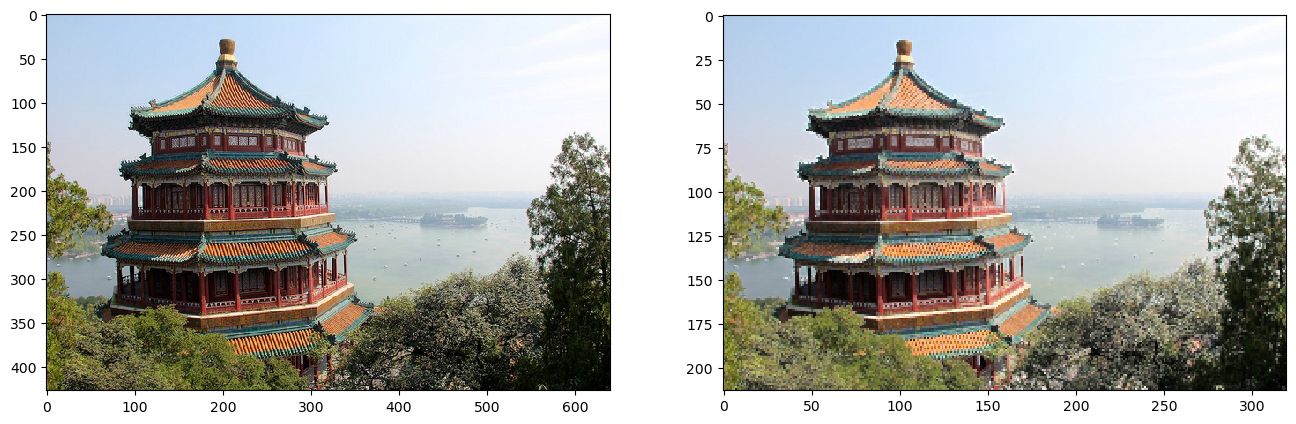

In [5]:
dataset = np.array([china], dtype=np.float32)
max_pool = tf.nn.max_pool(dataset, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding="VALID")
plt.figure(figsize=(16, 12))
plt.subplot(121)
plot_color_image(dataset[0])
plt.subplot(122)
plot_color_image(max_pool[0])
plt.show()


4. 典型的CNN架构
⼀些卷积层（每个通常后跟⼀个ReLU层），
然后是⼀个池化层，
然后是另外⼏个卷积层（+ ReLU），
然后是另⼀个池层.
下⾯是最近⼏年出现的⼀些优秀的CNN架构。
经典LeNet-5架构（1998）
AlexNet（2012）
GoogLeNet（2014）
ResNet（2015）
5. MNIST CNN实现
分析并运⾏下列代码，完成如下任务：
1. 阅读代码，分析CNN和全链接⽹络的相同点和不同点；
2. 运⾏代码，从运⾏时间、准确性等⽅⾯与全连接⽹络进⾏⽐较；
3. 尝试提出改进⽅案，提⾼模型的准确率


In [10]:
import os 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np

(X_tarin, y_train), (X_test, y_test) = mnist.load_data()
X_train4D = X_tarin.reshape(X_tarin.shape[0], 28, 28, 1).astype('float32')
X_test4D=X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train4D_Normalize=X_train4D / 255  # 归⼀化
X_test4D_Normalize=X_test4D / 255
y_trainOnehot=to_categorical(y_train)
y_testOnehot=to_categorical(y_test)

In [11]:
# 建⽴模型
model = Sequential()
# ⼀层卷积
model.add(Conv2D(filters=16,
                 kernel_size=(5, 5),
                 padding='SAME',
                 input_shape=(28, 28, 1),
                 activation='relu'))
# 池化层1
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# ⼆层卷积
model.add(Conv2D(filters=32,
                 kernel_size=(5, 5),
                 padding='SAME',
                 activation='relu'))


In [12]:
# 池化层2
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,
                 kernel_size=(5, 5),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128,
                 kernel_size=(5, 5),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [13]:
# 编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [14]:
train_history = model.fit(x=X_train4D_Normalize,
                          y=y_trainOnehot,
                          validation_split=0.2,
                          batch_size=300,
                          epochs=10,
                          verbose=2)


Epoch 1/10
160/160 - 27s - loss: 0.5182 - accuracy: 0.8264 - val_loss: 0.0954 - val_accuracy: 0.9709 - 27s/epoch - 166ms/step
Epoch 2/10
160/160 - 25s - loss: 0.1211 - accuracy: 0.9622 - val_loss: 0.0601 - val_accuracy: 0.9810 - 25s/epoch - 157ms/step
Epoch 3/10
160/160 - 24s - loss: 0.0843 - accuracy: 0.9748 - val_loss: 0.0461 - val_accuracy: 0.9868 - 24s/epoch - 150ms/step
Epoch 4/10
160/160 - 24s - loss: 0.0674 - accuracy: 0.9791 - val_loss: 0.0427 - val_accuracy: 0.9878 - 24s/epoch - 147ms/step
Epoch 5/10
160/160 - 24s - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0468 - val_accuracy: 0.9869 - 24s/epoch - 150ms/step
Epoch 6/10
160/160 - 24s - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0323 - val_accuracy: 0.9902 - 24s/epoch - 152ms/step
Epoch 7/10
160/160 - 24s - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0321 - val_accuracy: 0.9907 - 24s/epoch - 148ms/step
Epoch 8/10
160/160 - 24s - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0311 - val_accuracy: 0.9911 - 24s/epoch - 148

In [16]:
# 评估模型
model.evaluate(X_test4D_Normalize, y_testOnehot)[1]
# 预测
predict_x = model.predict(X_test4D_Normalize)
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 5ms/step
